# Part 1: MAP
## 1.Generate 50 2D-data points using the following function: $y=sin(x^2+1)$
## 2.Add Gaussian random noise to the data
## 3.Show the original curve line and the noisy data.

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


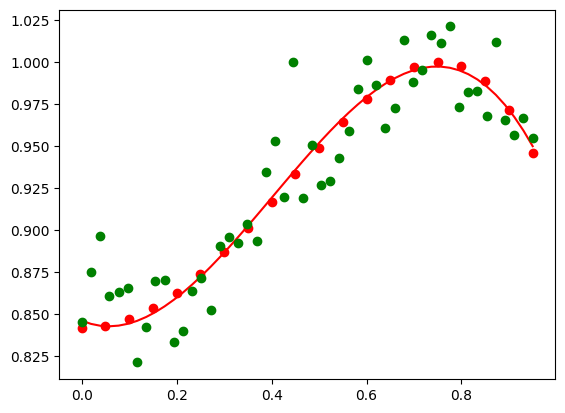

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.03
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f



#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()
    

## 4.Fit the generated noisy data using the MAP as discussed in class.

M = 5
alpha = 0.1


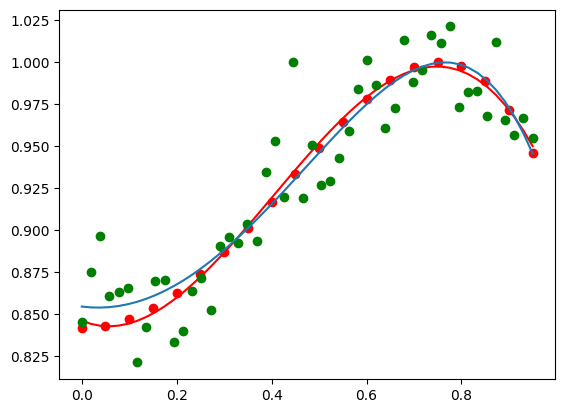

In [17]:
def my_MAP_fitting(x,y,M,alpha):
    N=len(x)
    sigma=0.03 #the noise sigma
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    I=np.identity(M+1)
    Ialpha=alpha*sigma*I
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)
    imxx=linalg.inv(mxx+Ialpha)
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    return w

def my_MAP_plot(x,w):
    M=len(w)-1
    N=len(x)
    
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
            
    y=np.dot(mx,w)
    return x,y

#===============================================
M = 5
alpha = 0.1

#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M,alpha)#choose M,alpha
[x_est,y_est]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('M=5 alpha=0.1')
plt.show()

## 5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [18]:
E = 0
for i in range(0, len(y_est)):
    e = abs(y_est[i] - y_noise[i])
    E = E + e
    
print('The total absolute error value E is', E)

The total absolute error value E is [0.8335318]


## 6.Display the estimated values of w

In [19]:
print('The estimated values of w is\n', w)

The estimated values of w is
 [[ 0.85429364]
 [-0.03576491]
 [ 0.5181083 ]
 [ 0.00731436]
 [-0.23365487]
 [-0.20489998]]


## 7.Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

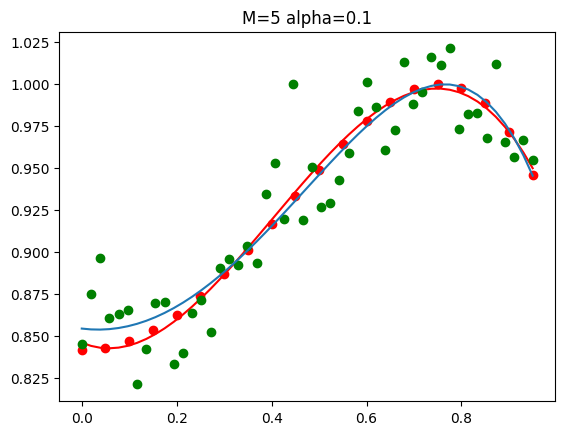

In [24]:
#estimate the curve from the noisy data
w=my_MAP_fitting(x_noise,y_noise,M=5,alpha=0.1)#choose M,alpha
[x_est,y_est]=my_MAP_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.title('M=5 alpha=0.1')
plt.show()

## 8.From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.